In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARMA

import warnings
warnings.filterwarnings("ignore")

time_series = pd.Series([151.0, 188.46, 199.38, 219.75, 241.55, 262.58, 328.22, 396.26, 442.04, 517.77, 626.52, 717.08, 824.38, 913.38, 1088.39, 1325.83, 1700.92, 2109.38, 2499.77, 2856.47, 3114.02, 3229.29, 3545.39, 3880.53, 4212.82, 4757.45, 5633.24, 6590.19, 7617.47, 9333.4, 11328.92, 12961.1, 15967.61])


time_series.index = pd.Index(sm.tsa.datetools.dates_from_range('1978','2010'))
time_series.plot(figsize=(12,8))

time_series_ori = time_series
plt.show()

<Figure size 1200x800 with 1 Axes>

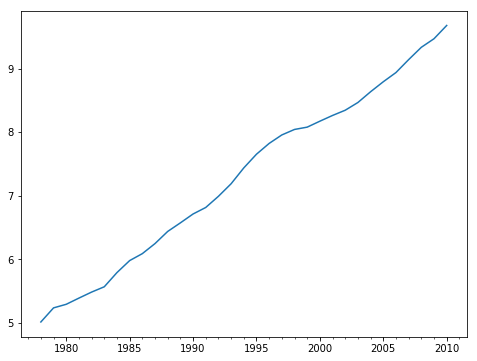

In [2]:
time_series = np.log(time_series)

time_series_log = time_series

time_series.plot(figsize=(8,6))
plt.show()

In [3]:
time_series

1978-12-31    5.017280
1979-12-31    5.238886
1980-12-31    5.295213
1981-12-31    5.392491
1982-12-31    5.487076
1983-12-31    5.570556
1984-12-31    5.793684
1985-12-31    5.982071
1986-12-31    6.091400
1987-12-31    6.249531
1988-12-31    6.440181
1989-12-31    6.575187
1990-12-31    6.714632
1991-12-31    6.817152
1992-12-31    6.992455
1993-12-31    7.189794
1994-12-31    7.438925
1995-12-31    7.654149
1996-12-31    7.823954
1997-12-31    7.957342
1998-12-31    8.043670
1999-12-31    8.080018
2000-12-31    8.173403
2001-12-31    8.263727
2002-12-31    8.345888
2003-12-31    8.467467
2004-12-31    8.636440
2005-12-31    8.793337
2006-12-31    8.938200
2007-12-31    9.141355
2008-12-31    9.335114
2009-12-31    9.469708
2010-12-31    9.678318
dtype: float64

In [4]:
t=sm.tsa.stattools.adfuller(time_series, )
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

                                value
Test Statistic Value         0.807369
p-value                      0.991754
Lags Used                           1
Number of Observations Used        31
Critical Value(1%)           -3.66143
Critical Value(5%)           -2.96053
Critical Value(10%)          -2.61932


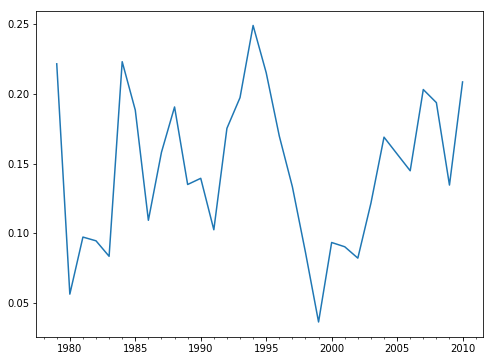

                                  value
Test Statistic Value           -3.52276
p-value                      0.00742139
Lags Used                             0
Number of Observations Used          31
Critical Value(1%)             -3.66143
Critical Value(5%)             -2.96053
Critical Value(10%)            -2.61932


In [5]:
time_series = time_series.diff(1)
time_series = time_series.dropna(how=any)
time_series.plot(figsize=(8,6))
plt.show()
t=sm.tsa.stattools.adfuller(time_series)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

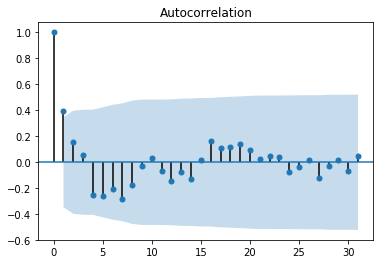

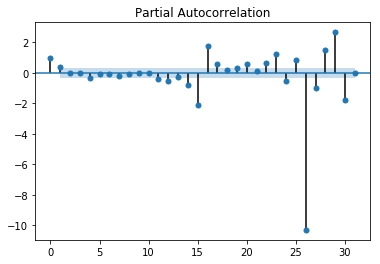

     lag        AC          Q       PAC  Prob(>Q)
0    1.0  0.394807   5.470618  0.394807  0.019339
1    2.0  0.154901   6.340817 -0.001150  0.041986
2    3.0  0.055267   6.455413 -0.006522  0.091438
3    4.0 -0.248371   8.852447 -0.317338  0.064895
4    5.0 -0.260612  11.589317 -0.074026  0.040870
5    6.0 -0.208604  13.410270 -0.056045  0.036964
6    7.0 -0.285771  16.964330 -0.177312  0.017628
7    8.0 -0.174044  18.337541 -0.069038  0.018833
8    9.0 -0.030905  18.382724  0.005425  0.030984
9   10.0  0.029119  18.424658  0.007243  0.048209
10  11.0 -0.066373  18.652901 -0.262074  0.067616
11  12.0 -0.146481  19.820146 -0.259094  0.070566
12  13.0 -0.072985  20.125172 -0.032766  0.092133
13  14.0 -0.127924  21.114325 -0.175995  0.098738
14  15.0  0.014849  21.128436 -0.019744  0.132776
15  16.0  0.162653  22.927440 -0.002973  0.115688
16  17.0  0.106608  23.751802 -0.076931  0.126337
17  18.0  0.114241  24.766054 -0.159748  0.131497
18  19.0  0.138092  26.362025 -0.125241  0.120414


In [6]:
plot_acf(time_series)
plot_pacf(time_series)
plt.show()

r,rac,Q = sm.tsa.acf(time_series, qstat=True)
prac = pacf(time_series,method='ywmle')
table_data = np.c_[range(1,len(r)), r[1:],rac,prac[1:len(rac)+1],Q]
table = pd.DataFrame(table_data, columns=['lag', "AC","Q", "PAC", "Prob(>Q)"])

print(table)

In [7]:
p,d,q = (1,1,2)
arma_mod = ARMA(time_series,(p,d,q)).fit(disp=-1,method='mle')
summary = (arma_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARMA
Model:              ARMA             BIC:                 -89.4537  
Dependent Variable: y                Log-Likelihood:      51.658    
Date:               2019-01-24 20:06 Scale:               1.0000    
No. Observations:   32               Method:              mle       
Df Model:           3                Sample:              12-31-1979
Df Residuals:       29                                    12-31-2010
Converged:          1.0000           S.D. of innovations: 0.048     
No. Iterations:     24.0000          HQIC:                -93.373   
AIC:                -95.3166                                        
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
const          0.1487     0.0130   11.4221   0.0000    0.1232   0.1743
ar.L1.y       -0.0346     0.3180   -0.1087   0.9142   

In [8]:
dta = time_series 
(p, q) =(sm.tsa.arma_order_select_ic(dta,max_ar=3,max_ma=3,ic='aic')['aic_min_order'])
#这里需要设定自动取阶的 p和q 的最大值，即函数里面的max_ar,和max_ma。ic 参数表示选用的选取标准，这里设置的为aic,当然也可以用bic。然后函数会算出每个 p和q 组合(这里是(0,0)~(3,3)的AIC的值，取其中最小的,这里的结果是(p=0,q=1)。

In [9]:
arma_mod = ARMA(time_series,(0,1,1)).fit(disp=-1,method='mle')
resid = arma_mod.resid
t=sm.tsa.stattools.adfuller(resid)
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

                                value
Test Statistic Value           -3.114
p-value                      0.025534
Lags Used                           1
Number of Observations Used        30
Critical Value(1%)           -3.66992
Critical Value(5%)           -2.96407
Critical Value(10%)          -2.62117


In [10]:
arma_model = sm.tsa.ARMA(time_series,(0,1)).fit(disp=-1,maxiter=100)
predict_data = arma_model.predict(start=str(1979), end=str(2010+3), dynamic = False)

In [11]:
predict_data_ori = predict_data
predict_data_ori_re = predict_data_ori.reset_index() 
predict_data_ori_re.rename(columns={0:'value1'}, inplace = True)
time_series_log_re = time_series_log.reset_index() 

In [12]:
time_series_log_re.rename(columns={0:'value2'}, inplace = True)
time_series_log_re.rename(columns={'index':'index1'}, inplace = True)

In [13]:
# concat
df_predict = pd.concat([predict_data_ori_re,time_series_log_re],axis=1)
df_predict.fillna(0,inplace = True)

In [23]:
df_predict[:10]

,index,value1,index1,value2,predict
0,1979-12-31,0.148903,1978-12-31 00:00:00,5.017280,5.166183
1,1980-12-31,0.180234,1979-12-31 00:00:00,5.238886,5.419120
2,1981-12-31,0.083328,1980-12-31 00:00:00,5.295213,5.378540
3,1982-12-31,0.156691,1981-12-31 00:00:00,5.392491,5.549182
4,1983-12-31,0.113660,1982-12-31 00:00:00,5.487076,5.600737
5,1984-12-31,0.131687,1983-12-31 00:00:00,5.570556,5.702242
6,1985-12-31,0.201155,1984-12-31 00:00:00,5.793684,5.994839
7,1986-12-31,0.141603,1985-12-31 00:00:00,5.982071,6.123674
8,1987-12-31,0.130448,1986-12-31 00:00:00,6.091400,6.221848
9,1988-12-31,0.164734,1987-12-31 00:00:00,6.249531,6.414265


In [14]:
df_predict['predict'] = df_predict['value1'] + df_predict['value2']
df_predict.loc[33,'predict'] = df_predict['predict'][32]+df_predict['value1'][33]
df_predict.loc[34,'predict'] = df_predict['predict'][33]+df_predict['value1'][34]

In [15]:
df_predict['value1'][:5]

0    0.148903
1    0.180234
2    0.083328
3    0.156691
4    0.113660
Name: value1, dtype: float64

In [16]:
df_predict['value2'][:5]

0    5.017280
1    5.238886
2    5.295213
3    5.392491
4    5.487076
Name: value2, dtype: float64

In [17]:
predict_data = df_predict[['index','predict']]

In [18]:
predict_data['exp'] = np.exp(predict_data['predict']) 

In [19]:
df_data = predict_data[['index','exp']]

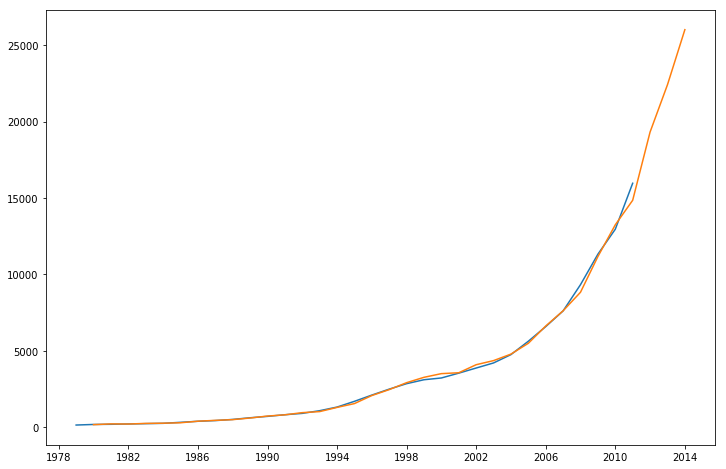

In [20]:
# time_series_ori.plot(figsize=(12,8))
# df_data.plot(figsize=(12,8))
plt.figure(figsize =(12,8))
plt.plot(time_series_ori.index,time_series_ori.values)
plt.plot(df_data['index'],df_data['exp'])
plt.show()